In [ ]:
import tensorflow as tf 
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [ ]:
x_train.shape     #32,32 is dimensionand 3 means RGB channel

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

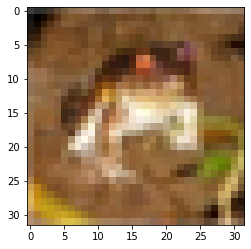

In [ ]:
plt.imshow(x_train[0]) # or plt.matshow(x_train[0])

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]              # returns class number of the class 

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
# As it is 2D we will change it to 1D i.e.flatten it 
y_train=y_train.reshape(-1,)  # -1 means we dont want to change 5000 wali dimension
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
 def plot_sample(X,y,index):
   plt.figure(figsize=(15,2))
   plt.imshow(X[index])
   plt.xlabel(classes[y[index]])

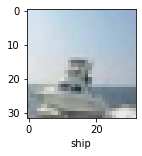

In [ ]:
plot_sample(x_train,y_train,100)

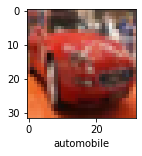

In [ ]:
plot_sample(x_train,y_train,5)


## Lets normalize it <br>
Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [ ]:

X_train=x_train/255.0
X_test=x_test/255.0
# you can use Std Scaler also

# Lets Build simple ANN so that we can compare it with our CNN in later part 

In [ ]:
ann= models.Sequential([
                         layers.Flatten(input_shape=(32,32,3)),
                         layers.Dense(3000,activation='relu'),
                         layers.Dense(1500,activation='relu'),
                         layers.Dense(10,activation='sigmoid')
                         
])

ann.compile(optimizer="SGD",loss='sparse_categorical_crossentropy',metrics=["accuracy"])
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 6s 3ms/step - loss: 1.8070 - accuracy: 0.3589
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6193 - accuracy: 0.4289
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5365 - accuracy: 0.4602
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4784 - accuracy: 0.4784
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4281 - accuracy: 0.4986


**You can see that at the end of 5 epochs, accuracy is at around 49.69%**

If Y is your hot encode means y=[0,0,1,0] 
we use **loss= categorical_cross entropy** 

If Y is Direct Value like **Y=8** we use **loss= sparse_categorical_cross entropy**

In [ ]:
ann.evaluate(X_test, y_test,batch_size=100)

100/100 [==============================] - 0s 3ms/step - loss: 1.4952 - accuracy: 0.4703


[1.4951635599136353, 0.47029998898506165]

In [ ]:
y_pred = ann.predict(X_test)
y_pred[0]

array([0.23090509, 0.42266753, 0.64827776, 0.9227664 , 0.4642437 ,
       0.8493308 , 0.85309535, 0.04370362, 0.6147513 , 0.12335659],
      dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.35      0.48      1000
           1       0.64      0.59      0.61      1000
           2       0.46      0.20      0.27      1000
           3       0.33      0.29      0.31      1000
           4       0.49      0.30      0.38      1000
           5       0.35      0.46      0.40      1000
           6       0.36      0.79      0.50      1000
           7       0.70      0.37      0.48      1000
           8       0.50      0.75      0.60      1000
           9       0.53      0.59      0.56      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.46     10000
weighted avg       0.51      0.47      0.46     10000



# Now let us build a convolutional neural network to train our images

In [ ]:
cnn= models.Sequential([
                        #cnn layer 
                        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
                        #filters =32 means 32 filter matrixs & kernal size means dimension of each matrix 
                        layers.MaxPooling2D((2,2)),

                        #you can add another if you want
                        layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu'),
                        layers.MaxPooling2D((2,2)),


                         #dense layer
                         layers.Flatten(), #coz we are  in middle layer nd network will figure it out automatically
                         layers.Dense(64,activation='relu'),
                         layers.Dense(10,activation='softmax') #softmax normalize output
                         
])

First we add convolution layer then we add pooling layer 


As max work will be done by cnn layer we can keep neurons in ann minimum 


Output of sigmoids are not normalized i.e. sum of all possible values wont give one like [0.45,0.67], But softmax normalize it 
like 0.45/sum of all values , 0.67/sum of all values.<br>

**Note** - *Sigmoid is proper activation function for Binary Classification*

### Architecture
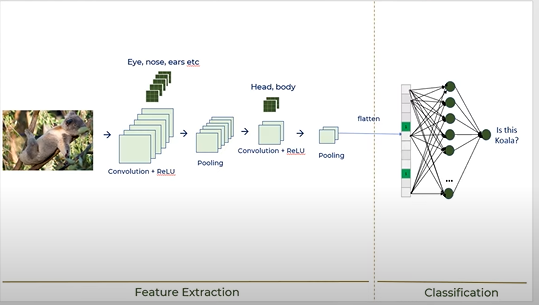

In [ ]:
cnn.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=["accuracy"])
cnn.fit(X_train,y_train,epochs=25)

Epoch 1/25
1563/1563 [==============================] - 6s 3ms/step - loss: 0.5879 - accuracy: 0.7931
Epoch 2/25
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5649 - accuracy: 0.7997
Epoch 3/25
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5430 - accuracy: 0.8076
Epoch 4/25
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5312 - accuracy: 0.8104
Epoch 5/25
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5140 - accuracy: 0.8176
Epoch 6/25
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4981 - accuracy: 0.8230
Epoch 7/25
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4812 - accuracy: 0.8286
Epoch 8/25
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4695 - accuracy: 0.8332
Epoch 9/25
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4560 - accuracy: 0.8363
Epoch 10/25
1563/1563 [==============================] - 5s 3ms/step - loss: 0.441

**With CNN, at the end 5 epochs, accuracy was at around 70.28% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.7091 - accuracy: 0.6587


[1.7091171741485596, 0.6586999893188477]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.7672654e-06, 7.5786559e-09, 1.1230712e-06, 9.9973625e-01,
        6.9927613e-05, 1.6266426e-04, 2.7064754e-05, 1.3849503e-07,
        6.8102253e-09, 6.6379194e-08],
       [6.8231523e-09, 9.6478069e-01, 4.3606839e-16, 1.7684513e-12,
        2.4561567e-22, 3.8662233e-14, 2.2008334e-25, 1.5006249e-19,
        3.5212785e-02, 6.4881265e-06],
       [6.3806218e-03, 9.0589201e-01, 1.4232536e-05, 2.1690170e-03,
        5.0346544e-10, 5.0399108e-06, 2.4511102e-08, 2.7687447e-08,
        4.1477982e-02, 4.4061046e-02],
       [8.9520043e-01, 8.1756055e-02, 6.5830784e-05, 1.7080832e-03,
        2.1674181e-05, 1.0483823e-06, 7.8027013e-05, 1.0285460e-06,
        2.1167817e-02, 5.1902789e-09],
       [4.1157708e-15, 5.2233808e-09, 8.7785523e-04, 8.3209462e-03,
        1.2494044e-01, 6.2318272e-06, 8.6585450e-01, 5.0221938e-09,
        2.0150671e-10, 4.9697263e-13]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 1, 0, 6]

In [ ]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

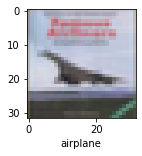

In [ ]:
#test data 
plot_sample(X_test, y_test,3)

In [ ]:
#predicted
classes[y_classes[3]]

'airplane'

In [ ]:
print("Classification Report: \n",classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.72      0.70      1000
           1       0.77      0.82      0.79      1000
           2       0.59      0.50      0.54      1000
           3       0.46      0.49      0.47      1000
           4       0.60      0.57      0.59      1000
           5       0.53      0.59      0.56      1000
           6       0.72      0.74      0.73      1000
           7       0.72      0.69      0.71      1000
           8       0.80      0.73      0.76      1000
           9       0.73      0.73      0.73      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000

